In [0]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
inFile = 'full'
images = np.load('drive/My Drive/' + inFile + '_images.npy', mmap_mode='r')
labels = np.load('drive/My Drive/' + inFile + '_labels.npy', mmap_mode='r')

#DROPOUT

In [0]:
# Model 12
#dropout on last hidden layer and on every convolutional layer
from keras.layers import  Dropout

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

model = models.Sequential()
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=2, activation='relu', input_shape=(512, 512, 1)))
model.add(layers.Dropout(0.5, name="dropout_1")) #<------ Dropout layer (0.5)
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(filters=2*512, kernel_size=(3, 3), strides=1, activation='relu'))
model.add(layers.Dropout(0.5, name="dropout_2")) #<------ Dropout layer (0.5)
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(4*512, (3, 3), activation='relu'))
model.add(layers.Dropout(0.5, name="dropout_3")) #<------ Dropout layer (0.5)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.5, name="dropout_out")) #<------ Dropout layer (0.5)
model.add(layers.Dense(1, activation='sigmoid'))

print(model.summary())

Using TensorFlow backend.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 255, 255, 512)     5120      
_________________________________________________________________
dropout_1 (Dropout)          (None, 255, 255, 512)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 512)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 83, 83, 1024)      4719616   
_________________________________________________________________
dropout_2 (Dropout)          (None, 83, 83, 1024)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 1024)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 2048)      1

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy', tf.keras.metrics.AUC()]) #'FalseNegatives', 'FalsePositives'])


history = model.fit(X_train, y_train, epochs=100,batch_size=5,
                    validation_data=(X_test, y_test))

Epoch 1/100
128/128 [==============================] - 44s 345ms/step - loss: 0.7621 - accuracy: 0.4719 - auc: 0.4636 - val_loss: 0.6941 - val_accuracy: 0.4625 - val_auc: 0.5000
Epoch 2/100
128/128 [==============================] - 46s 356ms/step - loss: 0.6935 - accuracy: 0.5000 - auc: 0.4664 - val_loss: 0.6936 - val_accuracy: 0.4625 - val_auc: 0.5000
Epoch 3/100
128/128 [==============================] - 47s 370ms/step - loss: 0.6936 - accuracy: 0.4672 - auc: 0.4574 - val_loss: 0.6930 - val_accuracy: 0.5375 - val_auc: 0.5000
Epoch 4/100
128/128 [==============================] - 47s 366ms/step - loss: 0.6937 - accuracy: 0.4719 - auc: 0.4640 - val_loss: 0.6930 - val_accuracy: 0.5375 - val_auc: 0.5000
Epoch 5/100
128/128 [==============================] - 47s 368ms/step - loss: 0.6936 - accuracy: 0.4766 - auc: 0.4755 - val_loss: 0.6932 - val_accuracy: 0.4625 - val_auc: 0.5000
Epoch 6/100
128/128 [==============================] - 47s 367ms/step - loss: 0.6933 - accuracy: 0.4938 - auc:

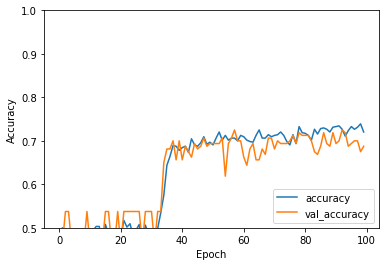

5/5 - 2s - loss: 0.6196 - accuracy: 0.6750 - auc_1: 0.7327
0.7327153086662292


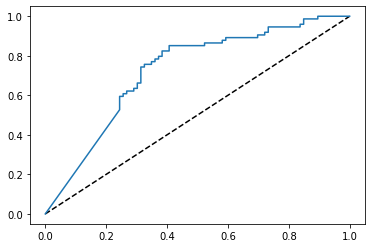

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

y_pred = model.predict(X_test).ravel()
fpr, tpr, threshold = roc_curve(y_test, y_pred)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()





#L2(0.1) REGULARIZATION ON JUST CONVOLUTIONAL LAYERS

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 255, 255, 512)     5120      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 85, 85, 512)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 83, 83, 1024)      4719616   
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 27, 27, 1024)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 25, 25, 2048)      18876416  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

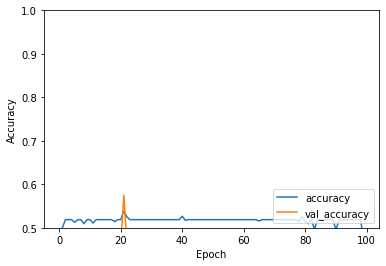

5/5 - 2s - loss: 0.8028 - accuracy: 0.4625 - auc_2: 0.5000
0.5


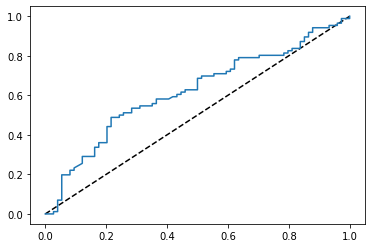

In [0]:
# Model 13
from keras.layers import  Dropout
from keras import regularizers
from keras.regularizers import l2

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

model = models.Sequential()
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=2, activation='relu', input_shape=(512, 512, 1), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(filters=2*512, kernel_size=(3, 3), strides=1, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(4*512, (3, 3), activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

model.add(layers.GlobalAveragePooling2D())

model.add(layers.Dense(1, activation='sigmoid'))

print(model.summary())


model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy', tf.keras.metrics.AUC()]) #'FalseNegatives', 'FalsePositives'])


history = model.fit(X_train, y_train, epochs=100,batch_size=5,
                    validation_data=(X_test, y_test))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

y_pred = model.predict(X_test).ravel()
fpr, tpr, threshold = roc_curve(y_test, y_pred)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()


#L2 Regularization in only the last convolutional layer, 0.01

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 255, 255, 512)     5120      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 512)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 83, 83, 1024)      4719616   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 1024)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 2048)      18876416  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2

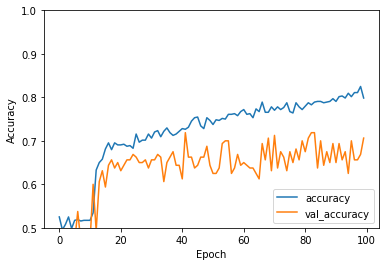

5/5 - 1s - loss: 0.7635 - accuracy: 0.7063 - auc: 0.7377
0.7377254366874695


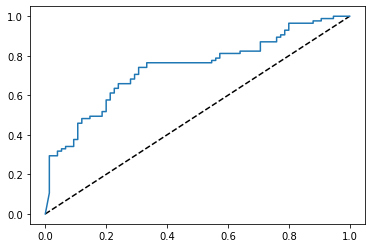

In [0]:
# Model 14
from keras.layers import  Dropout
from keras import regularizers
from keras.regularizers import l2

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

model = models.Sequential()
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=2, activation='relu', input_shape=(512, 512, 1)))

model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(filters=2*512, kernel_size=(3, 3), strides=1, activation='relu'))

model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(4*512, (3, 3), activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

model.add(layers.GlobalAveragePooling2D())

model.add(layers.Dense(1, activation='sigmoid'))

print(model.summary())


model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy', tf.keras.metrics.AUC()]) #'FalseNegatives', 'FalsePositives'])


history = model.fit(X_train, y_train, epochs=100,batch_size=5,
                    validation_data=(X_test, y_test))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

y_pred = model.predict(X_test).ravel()
fpr, tpr, threshold = roc_curve(y_test, y_pred)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()


L1 Regularization in the Last Convolutional layer, 0.00001

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 255, 255, 512)     5120      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 85, 85, 512)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 83, 83, 1024)      4719616   
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 27, 27, 1024)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 25, 25, 2048)      18876416  
_________________________________________________________________
global_average_pooling2d_4 ( (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

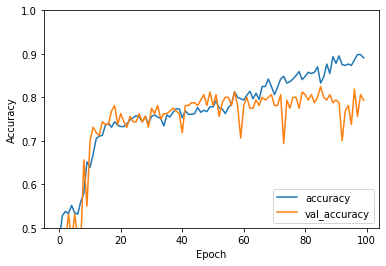

5/5 - 1s - loss: 0.5899 - accuracy: 0.7937 - auc_4: 0.8584
0.8584314584732056


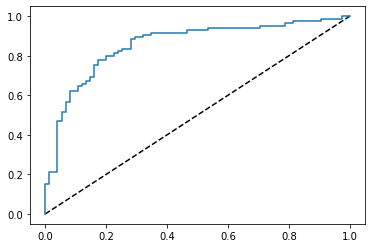

In [0]:
# Model 15
from keras.layers import  Dropout
from keras import regularizers
from keras.regularizers import l2,l1

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

model = models.Sequential()
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=2, activation='relu', input_shape=(512, 512, 1)))

model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(filters=2*512, kernel_size=(3, 3), strides=1, activation='relu'))

model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(4*512, (3, 3), activation='relu', kernel_regularizer=l1(0.00001)))

model.add(layers.GlobalAveragePooling2D())

model.add(layers.Dense(1, activation='sigmoid'))

print(model.summary())


model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy', tf.keras.metrics.AUC()]) #'FalseNegatives', 'FalsePositives'])


history = model.fit(X_train, y_train, epochs=100,batch_size=5,
                    validation_data=(X_test, y_test))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

y_pred = model.predict(X_test).ravel()
fpr, tpr, threshold = roc_curve(y_test, y_pred)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

L1 REGULARIZATION ON JOE'S 4 C 3 L CNNN, ON FINAL CONVOLUTIONAL LAYER AND FINAL DENSE LAYER


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 255, 255, 512)     5120      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 85, 85, 512)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 42, 42, 1024)      4719616   
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 1024)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 2048)      18876416  
_________________________________________________________________
global_max_pooling2d_3 (Glob (None, 2048)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1000)             

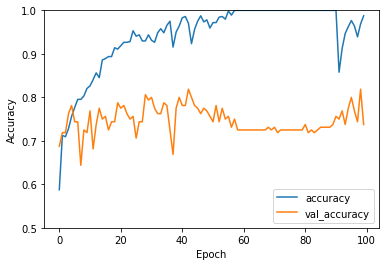

5/5 - 1s - loss: 1.9641 - accuracy: 0.7375 - auc_3: 0.7947
0.7947450876235962


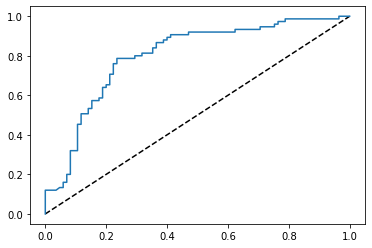

In [0]:
from keras.layers import  Dropout
from keras import regularizers
from keras.regularizers import l2,l1


X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

model = models.Sequential()
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=2, activation='relu', input_shape=(512, 512, 1)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(filters=2*512, kernel_size=(3, 3), strides=2, activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(4*512, (3, 3), activation='relu', kernel_regularizer=l1(0.00001)))
model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu', kernel_regularizer=l1(0.00001)))
model.add(layers.Dense(1, activation='sigmoid'))

print(model.summary())


model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy', tf.keras.metrics.AUC()]) #'FalseNegatives', 'FalsePositives'])


history = model.fit(X_train, y_train, epochs=100,batch_size=5,
                    validation_data=(X_test, y_test))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

y_pred = model.predict(X_test).ravel()
fpr, tpr, threshold = roc_curve(y_test, y_pred)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

L1 ON ALL LAYERS, 0.000001


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 255, 255, 512)     5120      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 85, 85, 512)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 42, 42, 1024)      4719616   
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 1024)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 12, 12, 2048)      18876416  
_________________________________________________________________
global_max_pooling2d_7 (Glob (None, 2048)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 1000)             

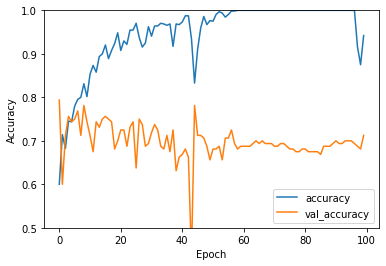

5/5 - 1s - loss: 1.2738 - accuracy: 0.7125 - auc_7: 0.7844
0.7844401597976685


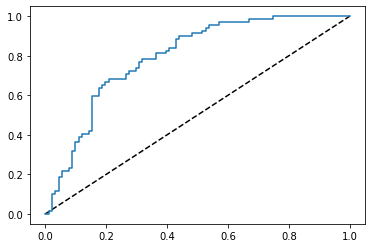

In [0]:
from keras.layers import  Dropout
from keras import regularizers
from keras.regularizers import l2,l1

reg = 0.000001
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

model = models.Sequential()
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=2, activation='relu', input_shape=(512, 512, 1), kernel_regularizer=l1(reg)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(filters=2*512, kernel_size=(3, 3), strides=2, activation='relu', kernel_regularizer=l1(reg)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(4*512, (3, 3), activation='relu', kernel_regularizer=l1(reg)))
model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(1000, activation='relu', kernel_regularizer=l1(reg)))
model.add(layers.Dense(300, activation='relu', kernel_regularizer=l1(reg)))
model.add(layers.Dense(100, activation='relu', kernel_regularizer=l1(reg)))
model.add(layers.Dense(1, activation='sigmoid'))

print(model.summary())


model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy', tf.keras.metrics.AUC()]) #'FalseNegatives', 'FalsePositives'])


history = model.fit(X_train, y_train, epochs=100,batch_size=5,
                    validation_data=(X_test, y_test))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

y_pred = model.predict(X_test).ravel()
fpr, tpr, threshold = roc_curve(y_test, y_pred)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

In [0]:
from keras.layers import  Dropout
from keras import regularizers
from keras.regularizers import l2,l1

reg = 0.0000005
drop = 0.25
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

model = models.Sequential()
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=2, activation='relu', input_shape=(512, 512, 1), kernel_regularizer=l1(reg)))
model.add(layers.Dropout(drop, name="dropout_1")) #<------ Dropout layer 
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(filters=2*512, kernel_size=(3, 3), strides=2, activation='relu', kernel_regularizer=l1(reg)))
model.add(layers.Dropout(drop, name="dropout_2")) #<------ Dropout layer 
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(4*512, (3, 3), activation='relu', kernel_regularizer=l1(reg)))
model.add(layers.Dropout(drop, name="dropout_3")) #<------ Dropout layer 
model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(1000, activation='relu', kernel_regularizer=l1(reg)))
model.add(layers.Dropout(drop, name="dropout_4")) #<------ Dropout layer 
model.add(layers.Dense(300, activation='relu', kernel_regularizer=l1(reg)))
model.add(layers.Dropout(drop, name="dropout_5")) #<------ Dropout layer 
model.add(layers.Dense(100, activation='relu', kernel_regularizer=l1(reg)))
model.add(layers.Dropout(drop, name="dropout_6")) #<------ Dropout layer 
model.add(layers.Dense(1, activation='sigmoid'))

print(model.summary())


model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy', tf.keras.metrics.AUC()]) #'FalseNegatives', 'FalsePositives'])


history = model.fit(X_train, y_train, epochs=100,batch_size=5,
                    validation_data=(X_test, y_test))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

y_pred = model.predict(X_test).ravel()
fpr, tpr, threshold = roc_curve(y_test, y_pred)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

Using TensorFlow backend.


NameError: ignored

L1 AND DROPOUT, 